In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
commits = pd.io.sql.read_sql('''SELECT uid, timestamp 
                        FROM checker
                        WHERE uid LIKE "user_%"''', con, 
                        parse_dates=['timestamp'])

commits.head()

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370


In [4]:
commits.dtypes

uid                  object
timestamp    datetime64[ns]
dtype: object

In [5]:
commits.timestamp.dt.hour

0        5
1        5
2        5
3        5
4        5
        ..
3202    20
3203    20
3204    20
3205    20
3206    20
Name: timestamp, Length: 3207, dtype: int64

In [6]:
commits['date'] = commits.timestamp.dt.date
commits['hour'] = commits.timestamp.dt.hour

In [7]:
commits

,uid,timestamp,date,hour
0,user_4,2020-04-17 05:19:02.744528,2020-04-17,5
1,user_4,2020-04-17 05:22:35.249331,2020-04-17,5
2,user_4,2020-04-17 05:22:45.549397,2020-04-17,5
3,user_4,2020-04-17 05:34:14.691200,2020-04-17,5
4,user_4,2020-04-17 05:34:24.422370,2020-04-17,5
...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,2020-05-21,20
3203,user_1,2020-05-21 20:22:41.785725,2020-05-21,20
3204,user_1,2020-05-21 20:22:41.877806,2020-05-21,20
3205,user_1,2020-05-21 20:37:00.129678,2020-05-21,20


In [8]:
commits['daytime'] = pd.cut(commits.hour, 
                            bins=[0,4,10,17,24],
                            labels=['nigth','morning', 'afternoon', 'evening'],
                            right=False,
                            include_lowest=True)

In [9]:
commits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   uid        3207 non-null   object        
 1   timestamp  3207 non-null   datetime64[ns]
 2   date       3207 non-null   object        
 3   hour       3207 non-null   int64         
 4   daytime    3207 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 103.7+ KB


In [10]:
commits_group = commits.groupby(['date', 'daytime'])['hour'].count().reset_index()

In [11]:
df_pivot = pd.pivot(commits_group, values='hour', index='date', columns='daytime')

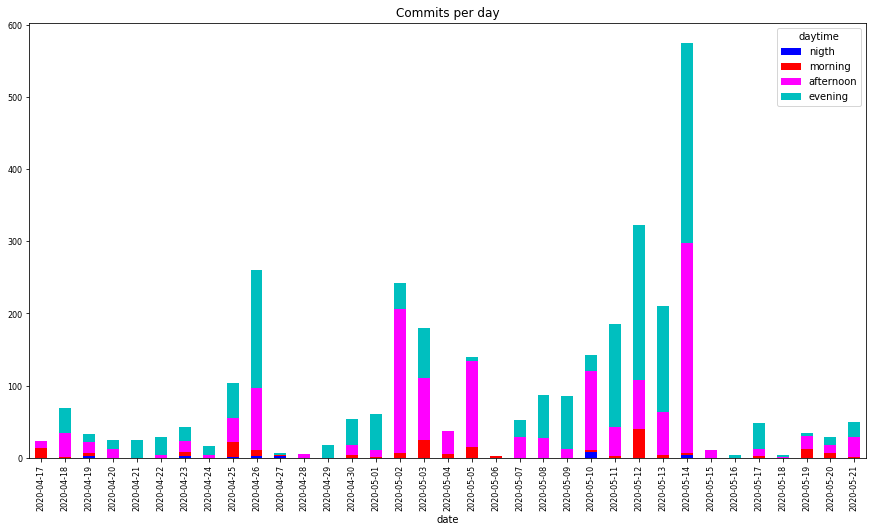

In [12]:
df_pivot.plot(kind='bar', stacked = True, figsize=(15,8),
             title='Commits per day', fontsize=8, rot=90, color=['b','r','magenta','c'])

When do our users usually commit the labs: in the night, morning, afternoon,
or evening?

In [13]:
values = list(df_pivot.sum().sort_values(ascending=False).head(2).index.values)
print('Two most common periods: ')
for i in values:
    print(i)

Two most common periods: 
evening
afternoon


In [14]:
res = df_pivot[df_pivot['evening'] > df_pivot['afternoon']]

In [15]:
date = res.sum(axis=1).sort_values(ascending=False).head(1).index[0]
print("Day with most number of commits:", date)

Day with most number of commits: 2020-05-12


In [16]:
con.close()